In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import tsfel
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

Task 2 : Decision Trees for Human Activity Recognition [3 marks]

Questions
1. Use Sklearn Library to train Decision Tress. [1.5 marks]
Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

In [ ]:
time = 10 # Setting the time window for each sample
offset = 100 # Skipping the first 100 rows to remove noise
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ", X_train.shape) # (number of samples, number of time steps (x (=10) sec * 50Hz), number of features)
print("Testing data shape: ", X_test.shape)
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)


print(f"Reshaped X_test data saved to", X_train)



Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
Training labels shape:  (126,)
Testing labels shape:  (54,)
Reshaped X_test data saved to [[[ 1.19648    -0.1606898  -0.740178  ]
  [ 1.22203    -0.2672951  -0.7717485 ]
  [ 1.22311    -0.4338634  -0.7678422 ]
  ...
  [ 0.4974957  -0.2795907  -0.2029592 ]
  [ 0.5064167  -0.286091   -0.2564634 ]
  [ 0.5609918  -0.302237   -0.2553743 ]]

 [[ 0.253887    0.6446213   0.7305601 ]
  [ 0.2547409   0.6470096   0.7330282 ]
  [ 0.256914    0.6468081   0.7354798 ]
  ...
  [ 0.2489302   0.642803    0.7323693 ]
  [ 0.2503708   0.6447095   0.7369245 ]
  [ 0.2513104   0.6440663   0.735841  ]]

 [[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 ...

 [[ 0.1943966   0.5317094   0.834933  ]
  [ 0.1938159   0.5319046   0.8337903 ]
  [ 0.1907

Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111


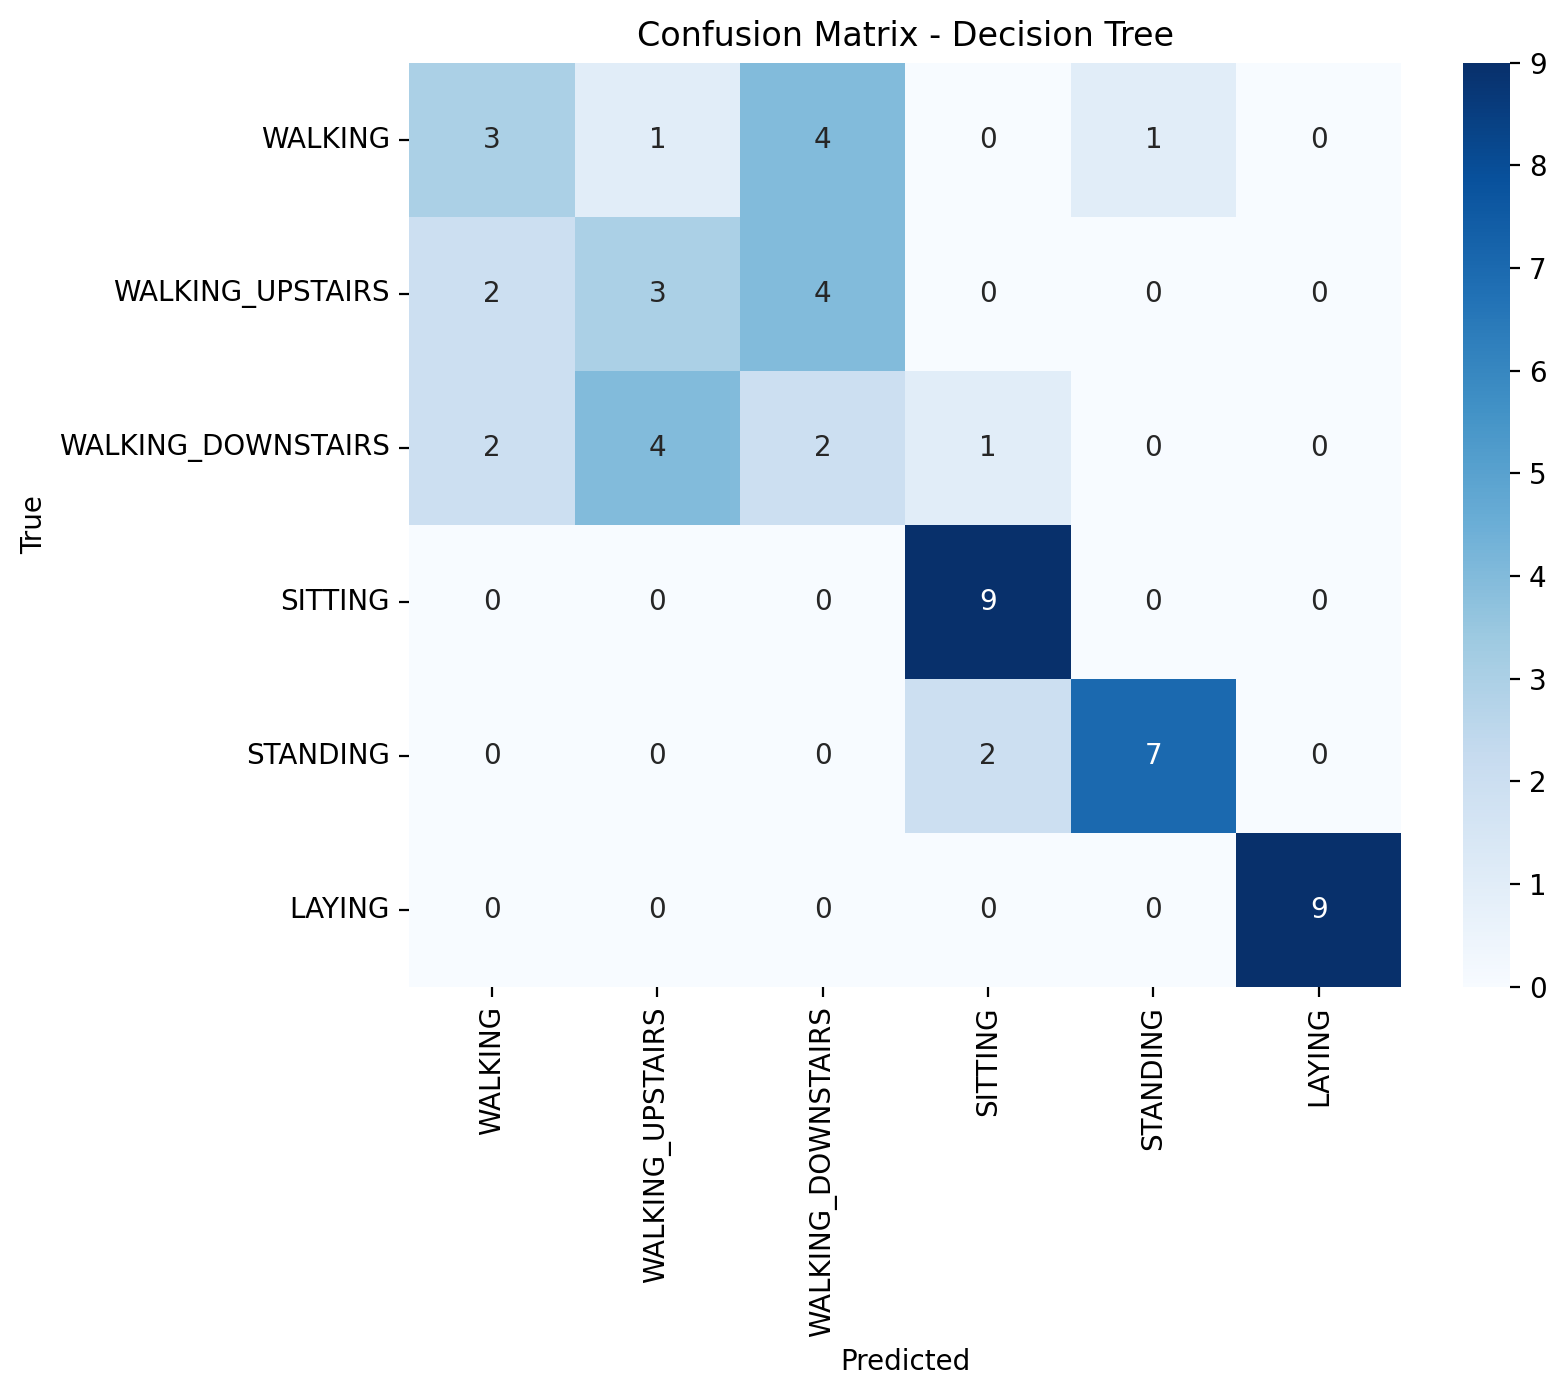

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Flatten the 3D data (samples, timesteps, features) → 2D (samples, timesteps*features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define and train Decision Tree
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)
clf.fit(X_train_flat, y_train)

# Predict on test data
ypred = clf.predict(X_test_flat)

# Evaluate performance
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='weighted')
recall = recall_score(y_test, ypred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ypred)
labels = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree")
plt.show()



Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [9]:

import numpy as np
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [10]:
cfg = tsfel.get_features_by_domain()

xtraintsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1, fs=50)
xtesttsfel  = tsfel.time_series_features_extractor(cfg, X_test, verbose=1, fs=50)

print(xtraintsfel.shape)
print(xtesttsfel.shape)
print(y_train.shape)
print(y_test.shape)


(126, 468)
(54, 468)
(126,)
(54,)


Accuracy: 0.8519
Precision: 0.8822
Recall: 0.8519


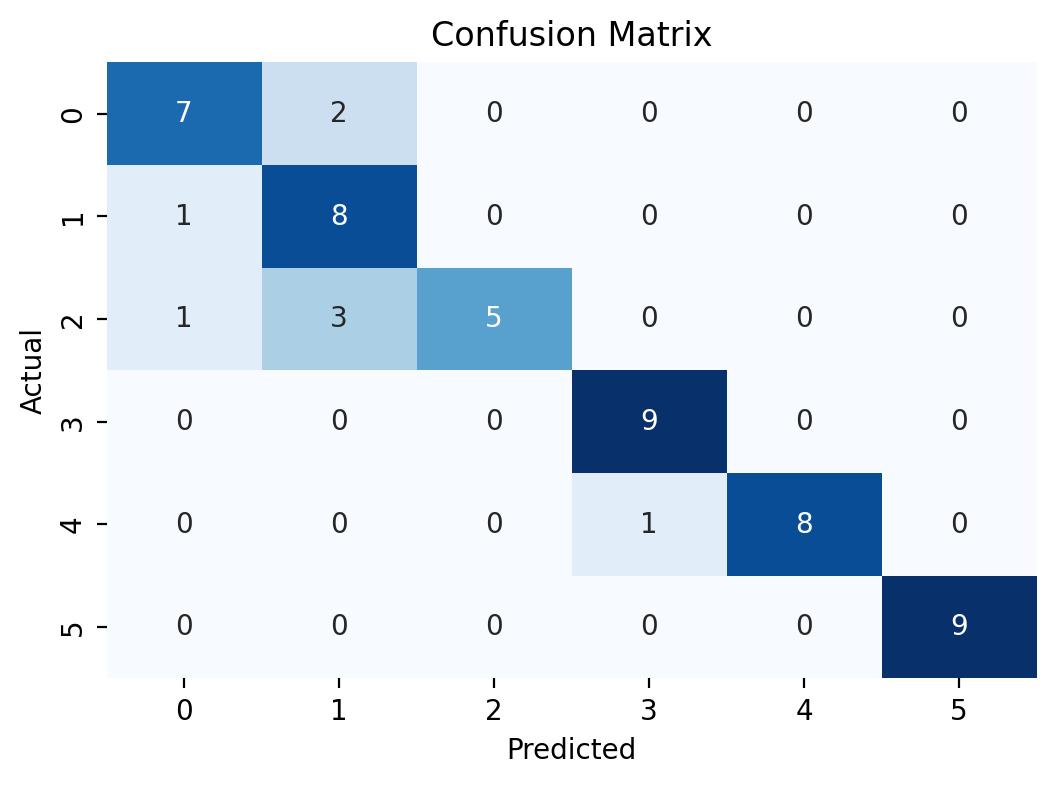

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Decision Tree Classifier
clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtraintsfel, y_train)

ypred = clf.predict(xtesttsfel)

# Evaluation
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred, average='macro')
recall = recall_score(y_test, ypred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

Accuracy: 0.8191
Precision: 0.8214
Recall: 0.8191
Confusion Matrix:
[[414  61  21   0   0   0]
 [ 76 350  45   0   0   0]
 [ 33  68 319   0   0   0]
 [  0   0   0 362 118  11]
 [  0   0   0  65 466   1]
 [  0   0   0  24  10 503]]


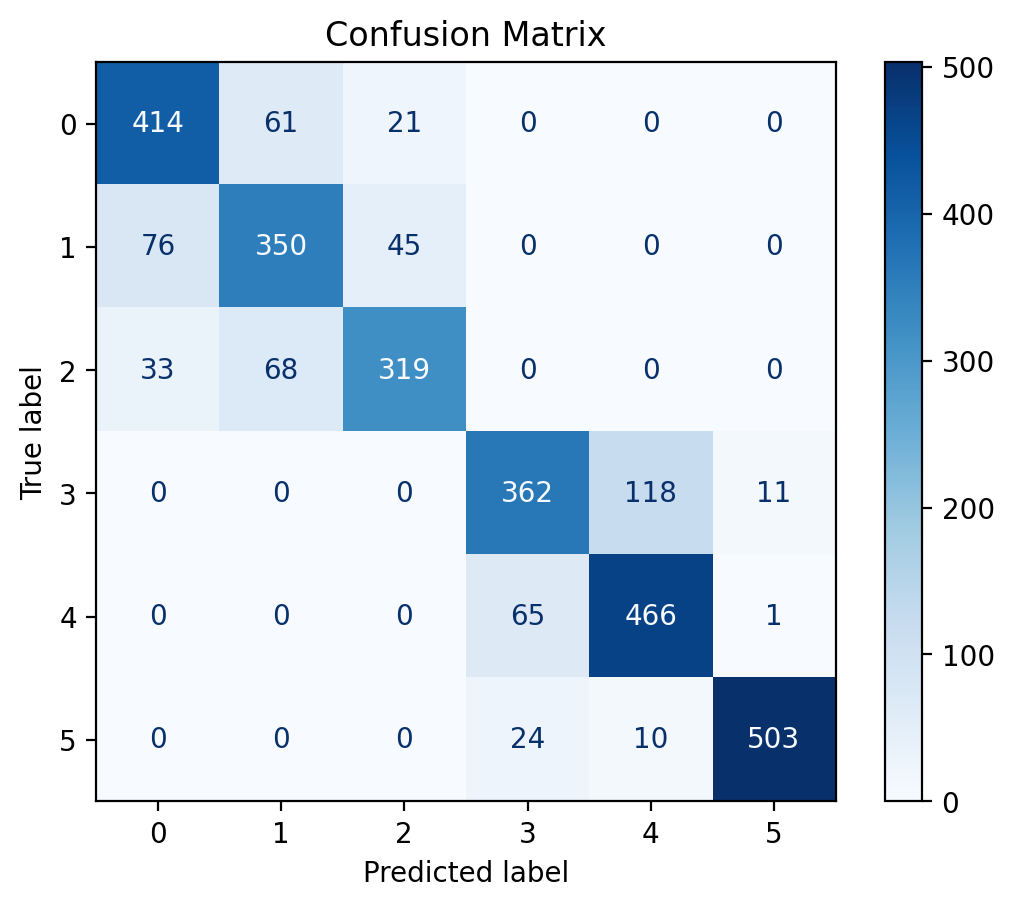

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train_path = 'train\X_train.txt'
Y_train_path = 'train\y_train.txt'
X_test_path = 'test\X_test.txt'
Y_test_path = 'test\y_test.txt'

X_train = np.loadtxt(X_train_path)
Y_train = np.loadtxt(Y_train_path)
X_test = np.loadtxt(X_test_path)
Y_test = np.loadtxt(Y_test_path)

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(X_train, Y_train)

ypred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, ypred)
precision = precision_score(Y_test, ypred, average='weighted')
recall = recall_score(Y_test, ypred, average='weighted')
conf_matrix = confusion_matrix(Y_test, ypred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

try:
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()
except Exception as e:
    print("Error during confusion matrix plotting:", e)

Compare the results of the three models. Which model do you think is better?

When we compare the three models, the decision tree trained on raw accelerometer data performs the worst, with an accuracy of about 61%. This is because the raw signals are noisy and overlapping, which makes it difficult for the model to separate activities such as walking, walking upstairs, and walking downstairs. Using the features already provided in the dataset improves the performance to around 82%, as these features capture more useful patterns than the raw data. However, the best performance is achieved when we use the features extracted through TSFEL, giving an accuracy of about 85% along with higher precision and recall. The TSFEL features include statistical, temporal, and frequency-based characteristics that make the data much more informative, allowing the decision tree to distinguish between activities more effectively. Therefore, the model trained on TSFEL features is the best among the three.

2. Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. [1 marks]

Depth: 2
Accuracy: 0.5000
Precision: 0.3371
Recall: 0.5000
------------------------------
Depth: 3
Accuracy: 0.6296
Precision: 0.5519
Recall: 0.6296
------------------------------
Depth: 4
Accuracy: 0.6296
Precision: 0.5906
Recall: 0.6296
------------------------------
Depth: 5
Accuracy: 0.7037
Precision: 0.6872
Recall: 0.7037
------------------------------
Depth: 6
Accuracy: 0.6481
Precision: 0.6501
Recall: 0.6481
------------------------------
Depth: 7
Accuracy: 0.6667
Precision: 0.6746
Recall: 0.6667
------------------------------
Depth: 8
Accuracy: 0.6111
Precision: 0.6048
Recall: 0.6111
------------------------------


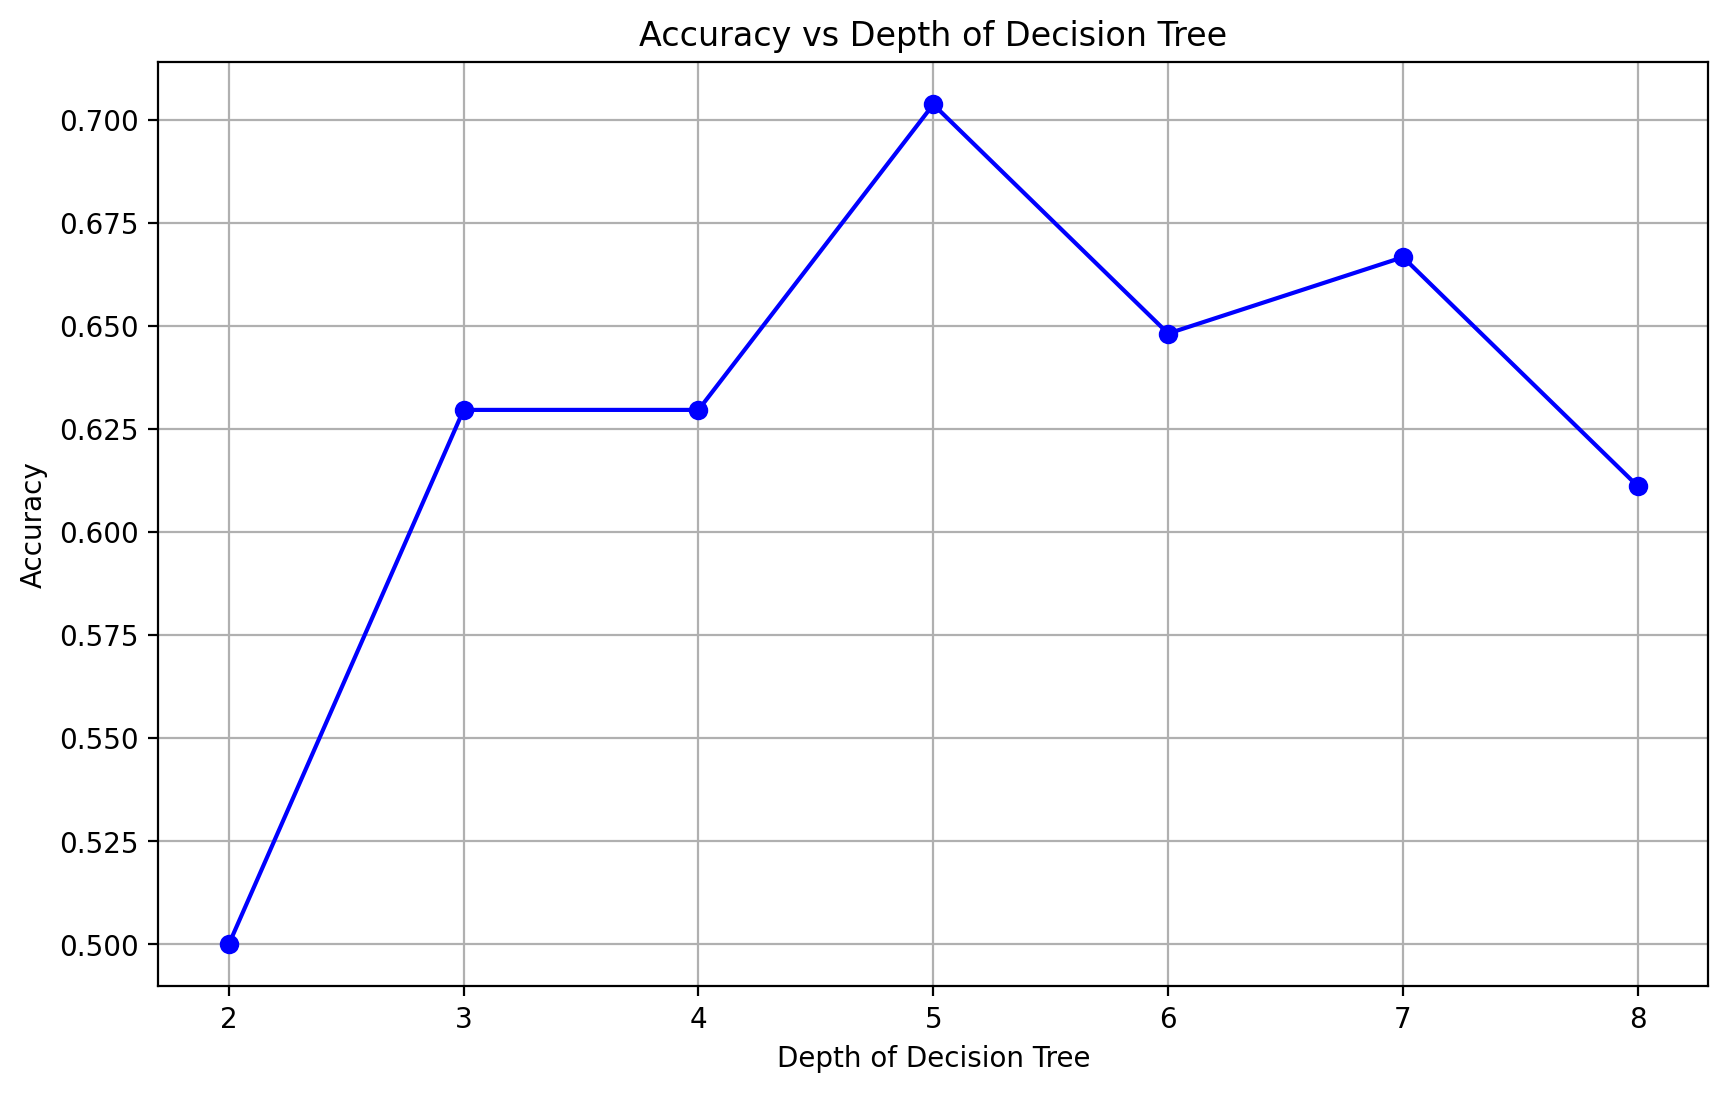

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    clf.fit(X_train_flat, y_train)   

    ypred = clf.predict(X_test_flat) 

    accuracy = accuracy_score(y_test, ypred)
    accuracies.append(accuracy)
    
    precision = precision_score(y_test, ypred, average='weighted', zero_division=0)
    recall = recall_score(y_test, ypred, average='weighted')
    
    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree')
plt.grid(True)
plt.show()


Depth: 2
Accuracy: 0.5769
Precision: 0.4484
Recall: 0.6667
------------------------------
Depth: 3
Accuracy: 0.7308
Precision: 0.8214
Recall: 0.7944
------------------------------
Depth: 4
Accuracy: 0.5769
Precision: 0.7217
Recall: 0.6194
------------------------------
Depth: 5
Accuracy: 0.7692
Precision: 0.7833
Recall: 0.7861
------------------------------
Depth: 6
Accuracy: 0.7308
Precision: 0.7786
Recall: 0.7583
------------------------------
Depth: 7
Accuracy: 0.7308
Precision: 0.7786
Recall: 0.7583
------------------------------
Depth: 8
Accuracy: 0.7308
Precision: 0.7786
Recall: 0.7583
------------------------------


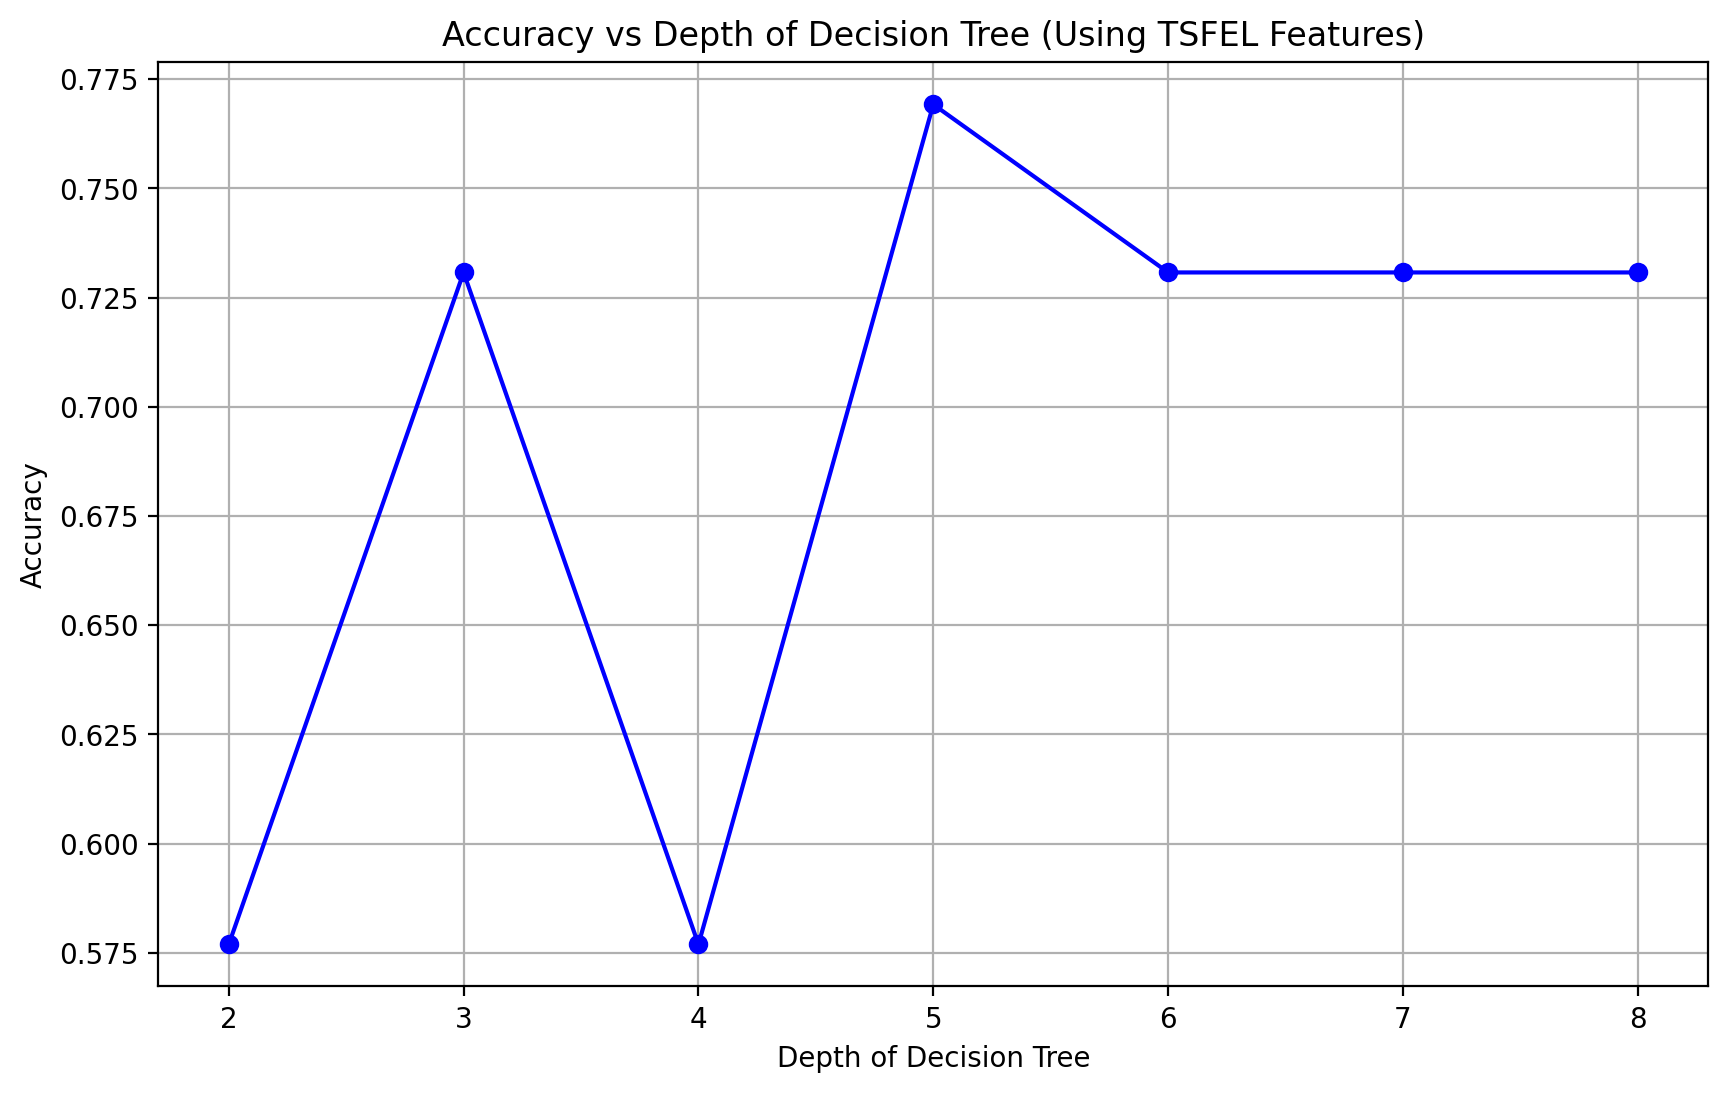

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

xtraintsfel, xtesttsfel, ytrain, ytest = train_test_split(xtraintsfel, y_train, test_size=0.2, random_state=42)

depths = range(2, 9)
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt', 
        max_depth=depth
    )

    clf.fit(xtraintsfel, ytrain)

    ypred = clf.predict(xtesttsfel)

    accuracy = accuracy_score(ytest, ypred)
    accuracies.append(accuracy)
    
    precision = precision_score(ytest, ypred, average='macro', zero_division=0)
    recall = recall_score(ytest, ypred, average='macro', zero_division=0)

    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("-" * 30)

plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth of Decision Tree (Using TSFEL Features)')
plt.grid(True)
plt.show()

C:\Users\Sia\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Depth: 2
Accuracy: 0.5490
Precision: 0.4634
Recall: 0.5490

Depth: 3
Accuracy: 0.6237
Precision: 0.6942
Recall: 0.6237

Depth: 4
Accuracy: 0.7251
Precision: 0.7585
Recall: 0.7251

Depth: 5
Accuracy: 0.7424
Precision: 0.7916
Recall: 0.7424

Depth: 6
Accuracy: 0.7869
Precision: 0.7954
Recall: 0.7869

Depth: 7
Accuracy: 0.8083
Precision: 0.8160
Recall: 0.8083

Depth: 8
Accuracy: 0.8188
Precision: 0.8258
Recall: 0.8188



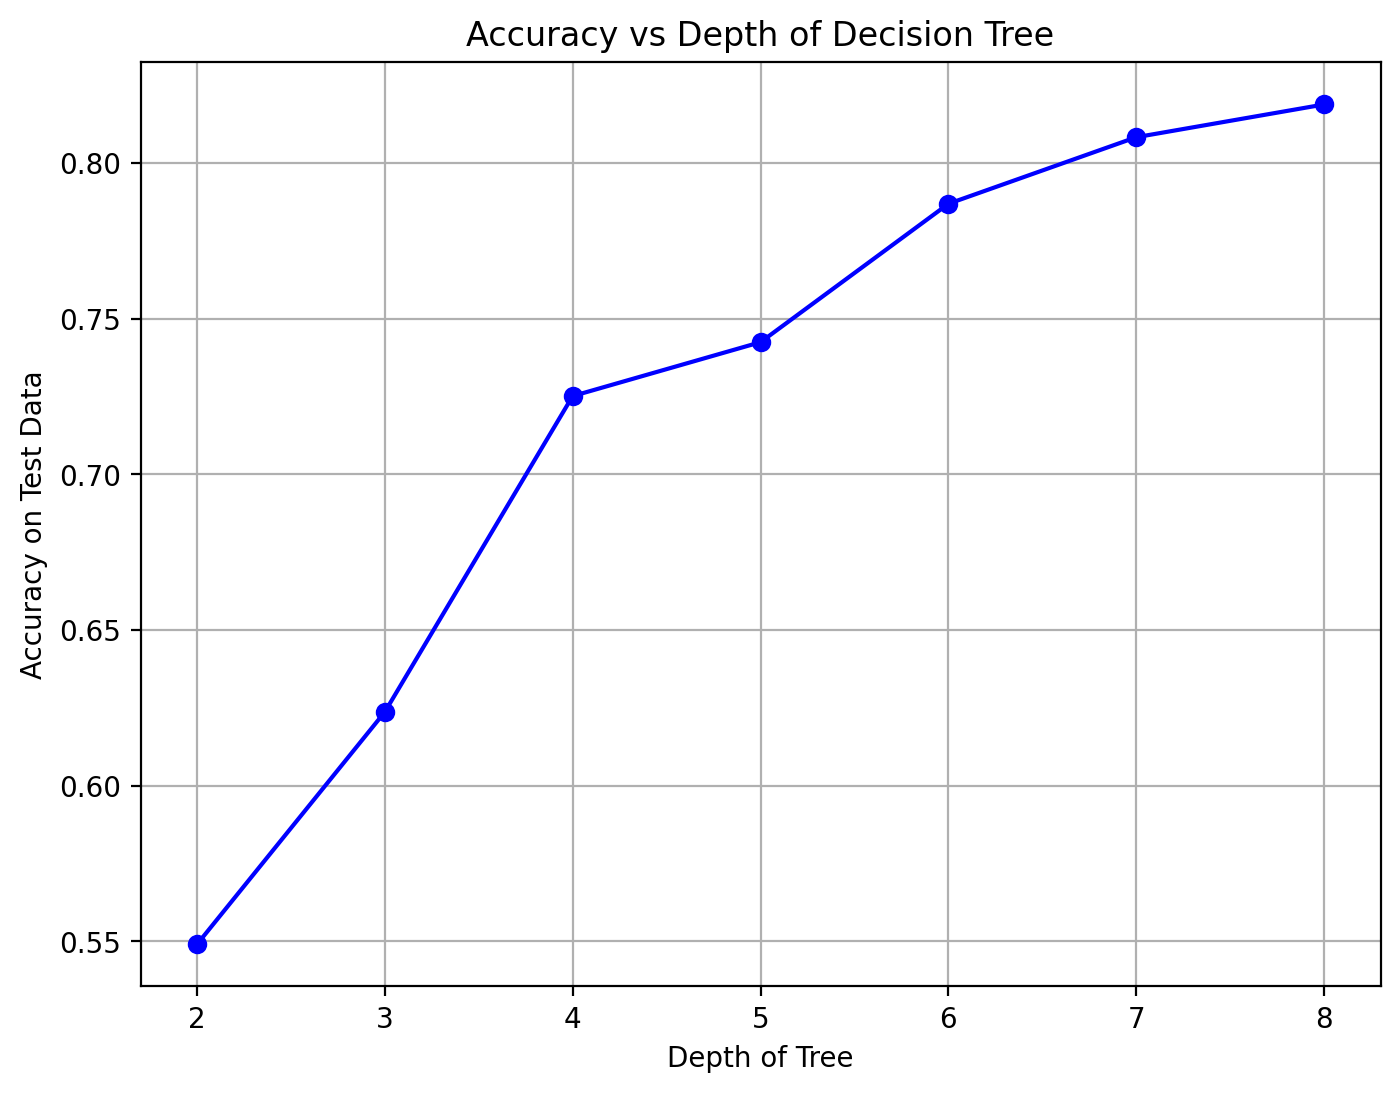

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

X_train_path = 'train\X_train.txt'
Y_train_path = 'train\y_train.txt'
X_test_path = 'test\X_test.txt'
Y_test_path = 'test\y_test.txt'

X_train = np.loadtxt(X_train_path)
Y_train = np.loadtxt(Y_train_path)
X_test = np.loadtxt(X_test_path)
Y_test = np.loadtxt(Y_test_path)


depths = range(2, 9) 
accuracies = []

for depth in depths:
    clf = DecisionTreeClassifier(
        criterion="gini", 
        random_state=46, 
        min_samples_split=4, 
        max_features='sqrt',
        max_depth=depth
    )

    clf.fit(X_train, Y_train)
    
    ypred = clf.predict(X_test)
    
    accuracy = accuracy_score(Y_test, ypred)
    accuracies.append(accuracy)

    precision = precision_score(Y_test, ypred, average='weighted')
    recall = recall_score(Y_test, ypred, average='weighted')
    conf_matrix = confusion_matrix(Y_test, ypred)

    print(f"Depth: {depth}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    print()

    

plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs Depth of Decision Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy on Test Data')
plt.grid(True)
plt.show()

3. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? 

The model performs poorly in distinguishing between the activities "Walking" and "Walking Downstairs," as these are often misclassified as "Walking Upstairs." This misclassification occurs because all three activities display similar patterns in acceleration data. The variations in acceleration for these activities are not distinct enough for the model to accurately differentiate between them.

C:\Users\maitr\AppData\Local\Temp\ipykernel_25744\457528391.py:8: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  axes[i].plot(data, label=["x acc", "y acc", "z acc"])


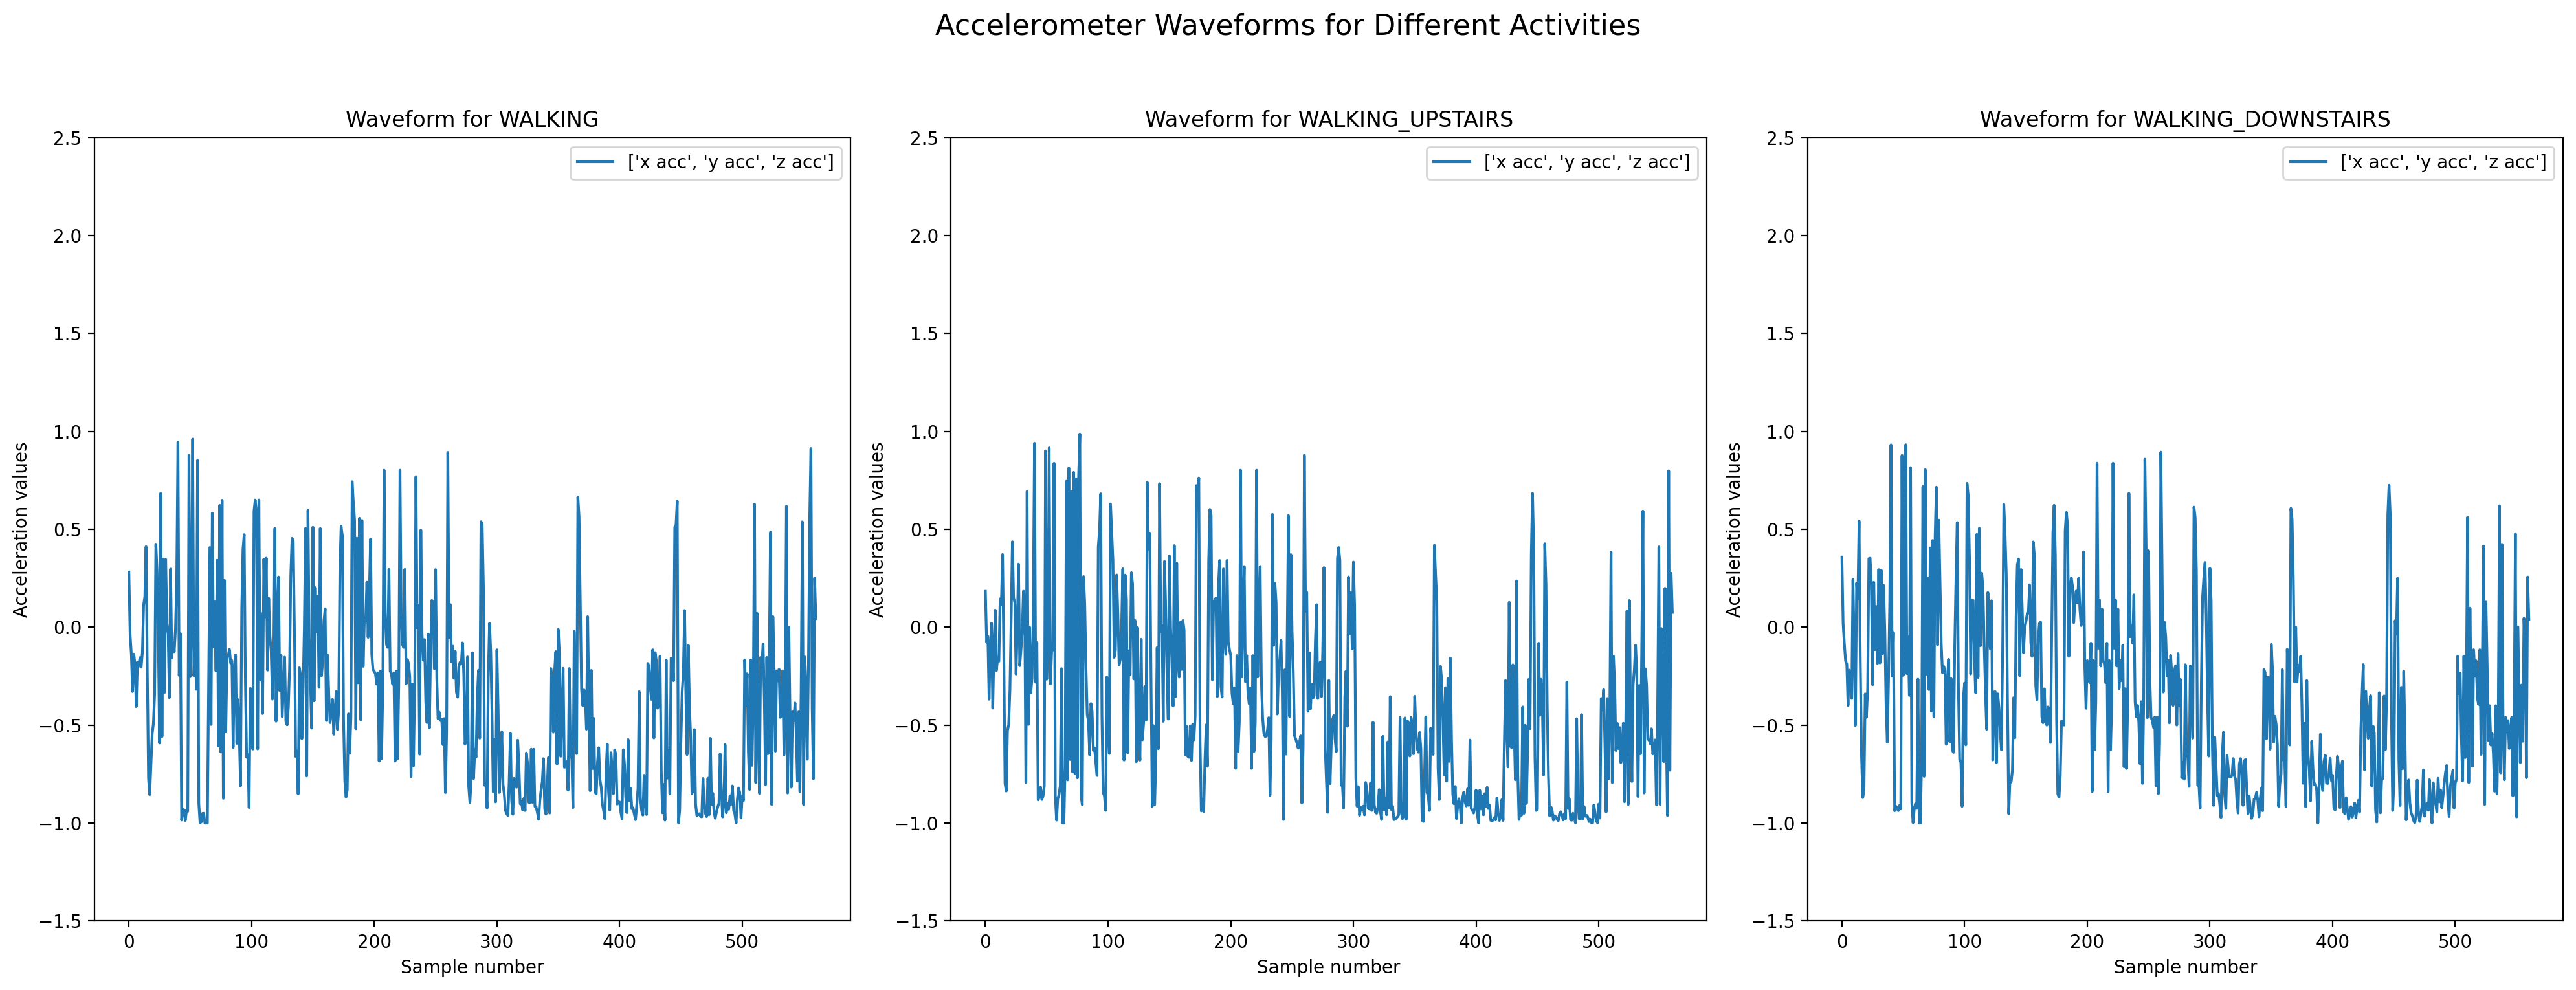

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = X_train[Y_train == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()